## Plotting Genes of interest under different Culture conditions after Guo2018Feedersfacilitatetelomere

Guo, R.; Ye, X.; Yang, J.; Zhou, Z.; Tian, C.; Wang, H.; Wang, H.; Fu, H.; Liu, C.; Zeng, M.; Yang, J. & Liu, L.
Feeders facilitate telomere maintenance and chromosomal stability of embryonic stem cells.
Nature Communications, Springer Science and Business Media LLC, 2018, 9

DOI: https://doi.org/10.1038/s41467-018-05038-2

GEO: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE109418

Summary 	
Pluripotent mouse embryonic stem cells (ESCs) were originally derived and stably maintained on feeder cells such as inactivated mouse embryo fibroblasts, and can generate complete ESC-pups by tetraploid embryo complementation (TEC), the most stringent functional test of naive pluripotency. Remarkably, 2i (inhibitors of Mek and Gsk3β signaling) medium with LIF in the absence of serum and feeders was developed to achieve ground state of mouse ESCs, and also has been successfully used for derivation of germline competent ESCs in other species such as rat. Notably, 2i-culture gives rise to transcriptional profiles and epigenetic landscapes quite distinct from serum-based ESCs. To better understand transcriptional landscape and signal transductions, we performed RNA-seq analysis of ESCs cultured in four different conditions: serum without feeder, serum with feeder, serum with feeder and 2i, and N2B27+2i.
  	
Overall design 	
We sought to investigate the differentiated expressed genes of N33 ESCs cultured in four conditions: serum without feeder (on gelatin, N33_G), serum with feeder (N33_F), serum with feeder and 2i (N33_F2i), and N2B27+2i (N33_NB2i). ESCs with biological duplicates were collected for RNA extraction and RNA-seq analysis simultaneously.

#### load modules

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as sch
import seaborn as sns

import pylab
from pylab import *

#### load data

In [2]:
df_G_1 = pd.read_excel('./Guo2018Feedersfacilitatetelomere/GSE109418_RAW.gene.fpkm.xls', sheet_name="GSM2942633_N33_G_rep1.gene.fpkm")
df_G_2 = pd.read_excel('./Guo2018Feedersfacilitatetelomere/GSE109418_RAW.gene.fpkm.xls', sheet_name="GSM2942634_N33_G_rep2.gene.fpkm")
df_F_1 = pd.read_excel('./Guo2018Feedersfacilitatetelomere/GSE109418_RAW.gene.fpkm.xls', sheet_name="GSM2942635_N33_F_rep1.gene.fpkm")
df_F_2 = pd.read_excel('./Guo2018Feedersfacilitatetelomere/GSE109418_RAW.gene.fpkm.xls', sheet_name="GSM2942636_N33_F_rep2.gene.fpkm")
df_F2i_1 = pd.read_excel('./Guo2018Feedersfacilitatetelomere/GSE109418_RAW.gene.fpkm.xls', sheet_name="GSM2942637_N33_F2i_rep1.gene.fpkm")
df_F2i_2 = pd.read_excel('./Guo2018Feedersfacilitatetelomere/GSE109418_RAW.gene.fpkm.xls', sheet_name="GSM2942638_N33_F2i_rep2.gene.fpkm")
df_NB2i_1 = pd.read_excel('./Guo2018Feedersfacilitatetelomere/GSE109418_RAW.gene.fpkm.xls', sheet_name="GSM2942639_N33_NB2i_rep1.gene.fpkm")
df_NB2i_2 = pd.read_excel('./Guo2018Feedersfacilitatetelomere/GSE109418_RAW.gene.fpkm.xls', sheet_name="GSM2942640_N33_NB2i_rep2.gene.fpkm")

In [3]:
df_G_1[:3]

,gene_id,transcript_id(s),length,expected_count,FPKM,Symbol,Cellular Component,Molecular Function,Biological Process,Kegg Orthology,Nr Description
0,100009600,NM_001103168,1010.0,37.0,1.83,Zglp1,NaN,NaN,NaN,K09183//GATA-binding protein 4,NaN
1,100017,NM_145554,2671.0,642.0,11.71,Ldlrap1,NaN,NaN,NaN,K12474//low density lipoprotein receptor adapt...,NaN
2,100019,NM_001081392,17959.0,6043.0,16.20,Mdn1,GO:0031981//nuclear lumen,GO:0005515//protein binding;GO:0017111//nucleo...,GO:0009154//purine ribonucleotide catabolic pr...,K14572//midasin,gi|124487133|ref|NP_001074861.1|//midasin [Mus...


In [4]:
loc_df_G_1 = df_G_1.loc[:,['Symbol','FPKM']]
loc_df_G_2 = df_G_2.loc[:,['Symbol','FPKM']]
loc_df_F_1 = df_F_1.loc[:,['Symbol','FPKM']]
loc_df_F_2 = df_F_2.loc[:,['Symbol','FPKM']]
loc_df_F2i_1 = df_F2i_1.loc[:,['Symbol','FPKM']]
loc_df_F2i_2 = df_F2i_2.loc[:,['Symbol','FPKM']]
loc_df_NB2i_1 = df_NB2i_1.loc[:,['Symbol','FPKM']]
loc_df_NB2i_2 = df_NB2i_2.loc[:,['Symbol','FPKM']]

In [5]:
loc_df_G_1

,Symbol,FPKM
0,Zglp1,1.83
1,Ldlrap1,11.71
2,Mdn1,16.20
3,Pydc3,0.10
4,Mfap1b,16.65
...,...,...
17715,Arfip1,10.94
17716,Prmt6,8.61
17717,Ifi44,0.01
17718,Tiparp,13.71


## set index to 'Symbol' and sort by Gennames

In [6]:
sort_df_G_1 = loc_df_G_1.set_index('Symbol').sort_values(by=['Symbol'], ascending=[True], inplace=False)
sort_df_G_2 = loc_df_G_2.set_index('Symbol').sort_values(by=['Symbol'], ascending=[True], inplace=False)
sort_df_F_1 = loc_df_F_1.set_index('Symbol').sort_values(by=['Symbol'], ascending=[True], inplace=False)
sort_df_F_2 = loc_df_F_2.set_index('Symbol').sort_values(by=['Symbol'], ascending=[True], inplace=False)
sort_df_F2i_1 = loc_df_F2i_1.set_index('Symbol').sort_values(by=['Symbol'], ascending=[True], inplace=False)
sort_df_F2i_2 = loc_df_F2i_2.set_index('Symbol').sort_values(by=['Symbol'], ascending=[True], inplace=False)
sort_df_NB2i_1 = loc_df_NB2i_1.set_index('Symbol').sort_values(by=['Symbol'], ascending=[True], inplace=False)
sort_df_NB2i_2 = loc_df_NB2i_2.set_index('Symbol').sort_values(by=['Symbol'], ascending=[True], inplace=False)

In [7]:
print(len(sort_df_G_1),
      len(sort_df_G_2),
      len(sort_df_F_1),
      len(sort_df_F_2), 
      len(sort_df_F2i_1),
      len(sort_df_F2i_2),
      len(sort_df_NB2i_1),
      len(sort_df_NB2i_2)
     )

17720 17723 18107 18075 18091 18111 17147 17114


## concatenate FPKMs on Gennames

In [8]:
Guo = [sort_df_G_1, 
       sort_df_G_2, 
       sort_df_F_1, 
       sort_df_F_2, 
       sort_df_F2i_1, 
       sort_df_F2i_2,
       sort_df_NB2i_1,
       sort_df_NB2i_2
      ]

df_Guo = pd.concat(Guo, axis=1)

print(df_Guo[:1])
print(len(df_Guo))

               FPKM  FPKM  FPKM  FPKM  FPKM  FPKM  FPKM  FPKM
0610005C13Rik  0.44  0.49  0.76  0.83  1.39  1.47  1.23  1.01
20278


## rename all FPKM colums

In [9]:
colum_names =['G_1',
              'G_2',
              'F_1',
              'F_2',
              'F2i_1',
              'F2i_2',
              'NB2i_1',
              'NB2i_2'
             ]

df_Guo = df_Guo.set_axis(colum_names, axis=1)

print(df_Guo[:1])
print(len(df_Guo))

                G_1   G_2   F_1   F_2  F2i_1  F2i_2  NB2i_1  NB2i_2
0610005C13Rik  0.44  0.49  0.76  0.83   1.39   1.47    1.23    1.01
20278


## remove duplicate Genes

In [10]:
rmdup_Guo = df_Guo.drop_duplicates()

print(rmdup_Guo[:1])
print(len(rmdup_Guo))

                G_1   G_2   F_1   F_2  F2i_1  F2i_2  NB2i_1  NB2i_2
0610005C13Rik  0.44  0.49  0.76  0.83   1.39   1.47    1.23    1.01
19214


## sort by G_1

In [11]:
rmdup_Guo.sort_values(by=['G_1'], ascending=[False], inplace=True)
rmdup_Guo

/home/pb1031/anaconda3/envs/Python3andR/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,G_1,G_2,F_1,F_2,F2i_1,F2i_2,NB2i_1,NB2i_2
Eef1a1,6078.10,6061.72,6259.54,6244.26,6288.69,6297.58,7350.23,7175.68
Ftl1,3608.52,3361.81,3587.07,3339.46,3384.18,3548.96,3261.61,3303.32
Gapdh,3563.94,3353.79,3302.78,3304.96,3270.02,3466.12,3409.30,3162.73
Ptma,3223.09,3055.86,2969.44,3089.22,3361.51,3405.96,3022.20,3229.01
Rps2,3077.88,2961.71,3043.68,2779.07,2961.11,3065.49,3676.54,3357.88
...,...,...,...,...,...,...,...,...
Mir486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.52
Mir6939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24
Mir7012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.74
Mir8111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15


## export to excel sheet

In [12]:
rmdup_Guo.to_excel('./Guo2018Feedersfacilitatetelomere/rmdup_Guo-FPKM.xlsx',
                   sheet_name='rmdup_Guo-FPKM')

## top50 Genes 

In [13]:
top50_Heatmap = rmdup_Guo.head(50)
top50_Heatmap[:3]

,G_1,G_2,F_1,F_2,F2i_1,F2i_2,NB2i_1,NB2i_2
Eef1a1,6078.10,6061.72,6259.54,6244.26,6288.69,6297.58,7350.23,7175.68
Ftl1,3608.52,3361.81,3587.07,3339.46,3384.18,3548.96,3261.61,3303.32
Gapdh,3563.94,3353.79,3302.78,3304.96,3270.02,3466.12,3409.30,3162.73


In [14]:
log10_top50_Heatmap = np.log10(top50_Heatmap)
log10_top50_Heatmap[:3]

,G_1,G_2,F_1,F_2,F2i_1,F2i_2,NB2i_1,NB2i_2
Eef1a1,3.783768,3.782596,3.796542,3.795481,3.798560,3.799174,3.866301,3.855863
Ftl1,3.557329,3.526573,3.554740,3.523676,3.529453,3.550101,3.513432,3.518951
Gapdh,3.551930,3.525536,3.518880,3.519166,3.514550,3.539844,3.532665,3.500062


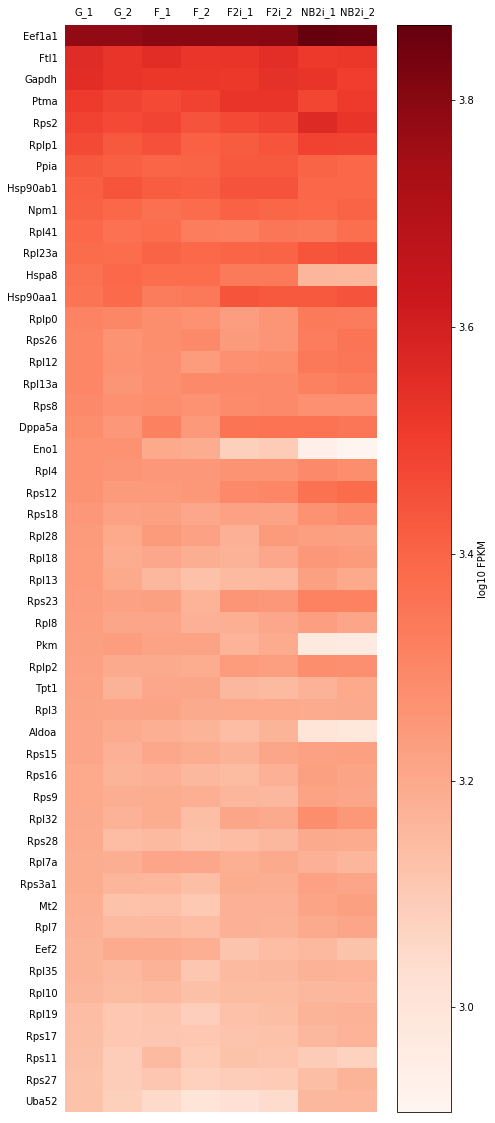

In [15]:
#df_indexed = rmdup_Guo.set_index('Protein')

column_labels = log10_top50_Heatmap.index #CGNP.axes[0]
row_labels = log10_top50_Heatmap.columns[:] #CGNP.axes[1]
data = log10_top50_Heatmap.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(7, 20))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='log10 FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
    
plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
#fig.savefig("Prot15-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

## filter for Genes of interest

In [44]:
labels = ['Dppa3',
          'Oct4', 'Pou5f1',
          'Zfp42',
          'Dppa2',
          'Nanog',
          'Zfp982', 'Gm13152',
          'Sox2',
          'Yap1',
          'Cdx2',
          'Eomes'
         ]

df_Heatmap = rmdup_Guo.loc[rmdup_Guo.index.intersection(labels),:]
df_Heatmap

,G_1,G_2,F_1,F_2,F2i_1,F2i_2,NB2i_1,NB2i_2
Pou5f1,606.01,569.14,583.09,595.15,602.03,620.25,765.13,735.75
Sox2,265.35,256.30,230.93,245.58,235.70,244.45,214.98,215.39
Nanog,208.49,198.70,271.07,269.25,465.08,481.66,294.76,303.72
Dppa3,69.31,67.66,60.13,55.51,33.42,34.63,28.10,28.42
Yap1,55.24,52.74,54.85,56.02,54.35,53.66,54.19,52.64
Dppa2,45.55,45.73,51.59,54.72,46.70,45.03,7.74,8.97
Zfp42,39.92,39.54,39.46,39.94,60.00,58.80,69.87,65.47
Gm13152,24.50,21.88,22.24,24.07,42.23,37.72,48.93,53.17
Eomes,3.05,2.98,3.03,2.87,2.66,2.66,5.67,5.68
Cdx2,0.23,0.16,0.21,0.20,0.35,0.39,0.09,0.14


### rename Genes

In [45]:
df_Heatmap = df_Heatmap.rename({'Pou5f1':'Oct4', 'Gm13152':'Zfp982'})
df_Heatmap

,G_1,G_2,F_1,F_2,F2i_1,F2i_2,NB2i_1,NB2i_2
Oct4,606.01,569.14,583.09,595.15,602.03,620.25,765.13,735.75
Sox2,265.35,256.30,230.93,245.58,235.70,244.45,214.98,215.39
Nanog,208.49,198.70,271.07,269.25,465.08,481.66,294.76,303.72
Dppa3,69.31,67.66,60.13,55.51,33.42,34.63,28.10,28.42
Yap1,55.24,52.74,54.85,56.02,54.35,53.66,54.19,52.64
Dppa2,45.55,45.73,51.59,54.72,46.70,45.03,7.74,8.97
Zfp42,39.92,39.54,39.46,39.94,60.00,58.80,69.87,65.47
Zfp982,24.50,21.88,22.24,24.07,42.23,37.72,48.93,53.17
Eomes,3.05,2.98,3.03,2.87,2.66,2.66,5.67,5.68
Cdx2,0.23,0.16,0.21,0.20,0.35,0.39,0.09,0.14


## Plott heatmap for the Genes of interest

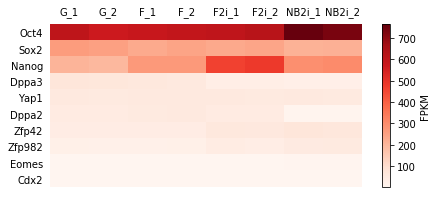

In [46]:
#df_indexed = rmdup_Guo.set_index('Protein')

column_labels = df_Heatmap.index #CGNP.axes[0]
row_labels = df_Heatmap.columns[:] #CGNP.axes[1]
data = df_Heatmap.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(7, 3))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
    
plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
fig.savefig("FPKM-Heatmap-Guo2018Feedersfacilitatetelomere.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

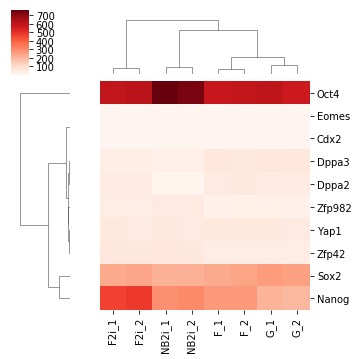

In [53]:
sns.clustermap(df_Heatmap, 
               #metric="correlation",
               #standard_scale=1,
               cmap='Reds',
               figsize=(5, 5)
               #yticklabels=False
              )
#plt.savefig("FPKM-Heatmap-Ngondo2018Argonaute2Is-short.svg", dpi=300)
#plt.savefig("FPKM-Heatmap-Ngondo2018Argonaute2Is-short.png", dpi=300)

## log10 

In [48]:
log10Heatmap = np.log10(df_Heatmap)
log10Heatmap

,G_1,G_2,F_1,F_2,F2i_1,F2i_2,NB2i_1,NB2i_2
Oct4,2.782480,2.755219,2.765736,2.774626,2.779618,2.792567,2.883735,2.866730
Sox2,2.423819,2.408749,2.363480,2.390193,2.372360,2.388190,2.332398,2.333226
Nanog,2.319085,2.298198,2.433081,2.430156,2.667528,2.682741,2.469469,2.482473
Dppa3,1.840796,1.830332,1.779091,1.744371,1.524006,1.539452,1.448706,1.453624
Yap1,1.742254,1.722140,1.739177,1.748343,1.735200,1.729651,1.733919,1.721316
Dppa2,1.658488,1.660201,1.712566,1.738146,1.669317,1.653502,0.888741,0.952792
Zfp42,1.601191,1.597037,1.596157,1.601408,1.778151,1.769377,1.844291,1.816042
Zfp982,1.389166,1.340047,1.347135,1.381476,1.625621,1.576572,1.689575,1.725667
Eomes,0.484300,0.474216,0.481443,0.457882,0.424882,0.424882,0.753583,0.754348
Cdx2,-0.638272,-0.795880,-0.677781,-0.698970,-0.455932,-0.408935,-1.045757,-0.853872


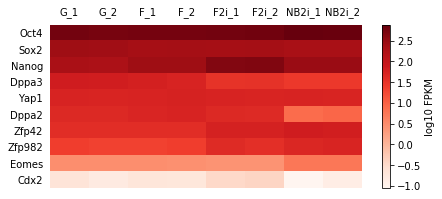

In [49]:
#df_indexed = rmdup_Guo.set_index('Protein')

column_labels = log10Heatmap.index #CGNP.axes[0]
row_labels = log10Heatmap.columns[:] #CGNP.axes[1]
data = log10Heatmap.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(7, 3))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='log10 FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)

plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
fig.savefig("log10-FPKM-Heatmap-Guo2018Feedersfacilitatetelomere.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

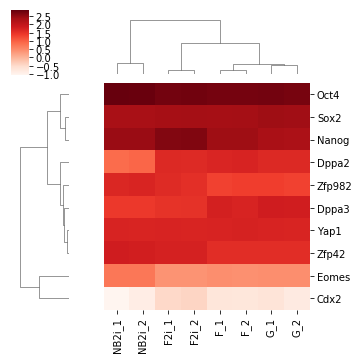

In [60]:
sns.clustermap(log10Heatmap, 
              #metric="correlation",
               #standard_scale=1,
               cmap='Reds',
               figsize=(5, 5)
               #yticklabels=False
              )
plt.savefig("log10-FPKM-Heatmap-Guo2018Feedersfacilitatetelomere-cluster.svg", dpi=300)

### conditions 

serum without feeder (on gelatin, N33_G), serum with feeder (N33_F), serum with feeder and 2i (N33_F2i), and N2B27+2i (N33_NB2i)